In [29]:
from moro import *
from moro.inverse_kinematics import *

In [49]:
RR = Robot((200,0,0,q1), (200,0,0,q2))

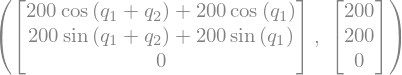

In [52]:
r_e = RR.T[:3,3]
r_d = Matrix([200,200,0])
r_e, r_d

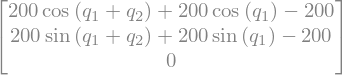

In [53]:
equations = r_e - r_d
equations

In [104]:
def gradient_descent(equations,variables,initial_guesses,eps=1e-6):
    J = equations.jacobian(variables)
    joint_pos = dict( zip(variables, initial_guesses) ) # joint pos
    q = sp.Matrix(initial_guesses)
    e = equations.subs(joint_pos)
    beta = beta0 = 0.5
    k = 0
    while e.norm() > eps:
        JN = J.subs( joint_pos )
        Jinv = JN.pinv()
        De = beta*-e
        Dq = Jinv*De
        q = q + Dq
        joint_pos = dict( zip(variables, q) ) # updating joint positions
        e = equations.subs(joint_pos)
        k += 1
        beta = (beta0)/(1 + 0.01*k)
        print(beta)
        if k > 100:
            raise ValueError(f"Could not find solution. Last calculated: {joint_pos} {e.norm()} {k}")
    return joint_pos, e.norm(), k

In [105]:
gradient_descent(equations, [q1,q2], [0.1, 0.1])

0.49504950495049505
0.49019607843137253
0.4854368932038835
0.4807692307692307
0.47619047619047616
0.4716981132075471
0.4672897196261682
0.4629629629629629
0.4587155963302752
0.45454545454545453
0.4504504504504504
0.4464285714285714
0.4424778761061947
0.43859649122807015
0.4347826086956522
0.4310344827586207
0.4273504273504274
0.42372881355932207
0.42016806722689076
0.4166666666666667
0.4132231404958678
0.4098360655737705
0.4065040650406504
0.40322580645161293
0.4
0.3968253968253968
0.39370078740157477
0.390625
0.38759689922480617
0.3846153846153846
0.38167938931297707
0.3787878787878788
0.37593984962406013
0.3731343283582089
0.37037037037037035
0.36764705882352944
0.36496350364963503
0.3623188405797102
0.3597122302158273


In [44]:
import sympy as sp

# Variables simbólicas
theta1, theta2 = sp.symbols('theta1 theta2')
L1, L2 = 1.0, 1.0  # Longitudes de los eslabones (puedes cambiar estos valores)
x_d, y_d = 1.0, 1.0  # Posición deseada del efector (puedes cambiar estos valores)

# Expresiones de la posición del efector
x = L1 * sp.cos(theta1) + L2 * sp.cos(theta1 + theta2)
y = L1 * sp.sin(theta1) + L2 * sp.sin(theta1 + theta2)

# Función de error
error_function = (x - x_d)**2 + (y - y_d)**2

# Gradiente de la función de error
gradient_theta1 = sp.diff(error_function, theta1)
gradient_theta2 = sp.diff(error_function, theta2)

# Convertir a funciones lambda para evaluación numérica
error_func = sp.lambdify([theta1, theta2], error_function, 'numpy')
grad_theta1_func = sp.lambdify([theta1, theta2], gradient_theta1, 'numpy')
grad_theta2_func = sp.lambdify([theta1, theta2], gradient_theta2, 'numpy')

# Parámetros del algoritmo de gradiente descendente
learning_rate = 0.35
tolerance = 1e-6
max_iterations = 1000

# Punto inicial para los ángulos
theta1_val, theta2_val = 0.1, 0.1  # Valores iniciales

# Algoritmo de gradiente descendente
for i in range(max_iterations):
    # Calcular el gradiente en el punto actual
    grad_theta1 = grad_theta1_func(theta1_val, theta2_val)
    grad_theta2 = grad_theta2_func(theta1_val, theta2_val)
    
    # Actualizar los ángulos
    theta1_val -= learning_rate * grad_theta1
    theta2_val -= learning_rate * grad_theta2
    
    # Calcular el error
    error = error_func(theta1_val, theta2_val)
    
    # Verificar convergencia
    if error < tolerance:
        print(f"Convergencia alcanzada en {i+1} iteraciones.")
        break
else:
    print("No se alcanzó la convergencia.")

print(f"Ángulos aproximados: θ1 = {theta1_val}, θ2 = {theta2_val}")
print(f"Error final: {error}")


Convergencia alcanzada en 41 iteraciones.
Ángulos aproximados: θ1 = 0.000498283050741496, θ2 = 1.5711162473487181
Error final: 9.176126640504216e-07
